In [6]:
import pandas_datareader.data as web
import datetime
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.api import set_commission, commission
from zipline.utils.factory import create_simulation_parameters
import matplotlib.pyplot as plt

# 1. Data

In [7]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

# 2. Zipline

In [9]:
def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))

def handle_data(context, data):
    #order_target(context.sym, 1)
    order(context.sym, 1)

In [10]:
algo = TradingAlgorithm(sim_params=create_simulation_parameters(
    capital_base=100000000),initialize = initialize, handle_data = handle_data)
result = algo.run(data)
print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash   ending_cash   ending_value
2016-01-04 21:00:00+00:00   1.000000e+08  1.000000e+08       0.000000
2016-01-05 21:00:00+00:00   1.000000e+08  9.995489e+07   45014.136719
2016-01-06 21:00:00+00:00   9.995489e+07  9.991160e+07   86398.101562
2016-01-07 21:00:00+00:00   9.991160e+07  9.986890e+07  127827.445312
2016-01-08 21:00:00+00:00   9.986890e+07  9.982397e+07  179330.515625
2016-01-11 21:00:00+00:00   9.982397e+07  9.978004e+07  219171.660156
2016-01-12 21:00:00+00:00   9.978004e+07  9.973520e+07  268451.250000
2016-01-13 21:00:00+00:00   9.973520e+07  9.969023e+07  314146.054688
2016-01-14 21:00:00+00:00   9.969023e+07  9.964571e+07  355393.875000
2016-01-15 21:00:00+00:00   9.964571e+07  9.960205e+07  392058.632812
2016-01-19 21:00:00+00:00   9.960205e+07  9.955889e+07  430629.218750
2016-01-20 21:00:00+00:00   9.955889e+07  9.951597e+07  471196.386719
2016-01-21 21:00:00+00:00   9.951597e+07  9.947245e+07  521111.250000
2016-01-22 21:00:00+

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until


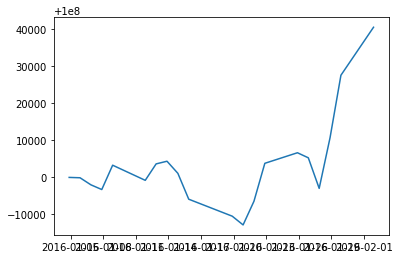

In [11]:
plt.plot(result['portfolio_value'])